<a href="https://colab.research.google.com/github/hargurjeet/Adhoc-Activities/blob/main/Data_Preprocessing_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPROCESSING USING PYTHON**

The notebook comprises a collection of commonly used preprocessing techniques that are essential for conducting effective data analysis and data science activities.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## **Handling Missing Values and Outliers**

### **Mean Imputation**

### **Imputation Using ML Algo**

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Create a SimpleImputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'Age' column
imputer.fit(titanic_df[['Age']])

# Transform the 'Age' column
titanic_df['Age'] = imputer.transform(titanic_df[['Age']])

# Verify the changes
print(titanic_df['Age'].isnull().sum())

0


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Outlier Identification - Visual**

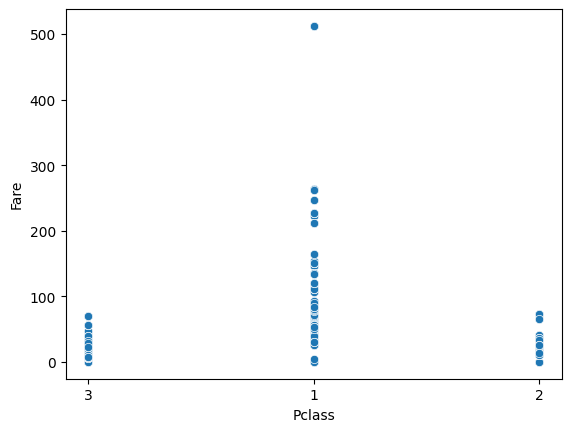

In [ ]:
# Create the scatter plot
sns.scatterplot(y='Fare', x=titanic_df['Pclass'].astype("string"), data=titanic_df)

# Show the plot
plt.show()

### Outlier Identification - IQR

In [ ]:
# Calculate the IQR
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

print(lower_bound, upper_bound)
# Identify the outliers
outliers = titanic_df[(titanic_df['Fare'] < lower_bound) | (titanic_df['Fare'] > upper_bound)]
outliers

-26.724 65.6344


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S


### Outlier Identification - Z Score

## **Handling Categorical Data**

### Mode Imputation

In [ ]:
## Impute missing values in 'Sex' and 'Embarked' columns with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
titanic_df[['Sex', 'Embarked']] = imputer.fit_transform(titanic_df[['Sex', 'Embarked']])

# Verify the changes
print(titanic_df[['Sex', 'Embarked']].isnull().sum())

Sex         0
Embarked    0
dtype: int64


In [ ]:
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# One hot encode 'Sex' and 'Embarked' columns
encoded_cols = encoder.fit_transform(titanic_df[['Sex', 'Embarked']])

# Convert the encoded columns to a dataframe and append to the original dataframe
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
titanic_df = pd.concat([titanic_df, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


## **Categorical Data - Encoding Techniques**

### Lable Encoding

### One Hot Encoding

## **Reference Material**

- Read menthod pandas - https://realpython.com/pandas-read-write-files/